In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator
from math import pi


In [2]:
qubits = QuantumRegister(3, 'x')
circuit = QuantumCircuit(qubits, name="QFT")
circuit.x(0)
circuit.x(1)
circuit.x(2)

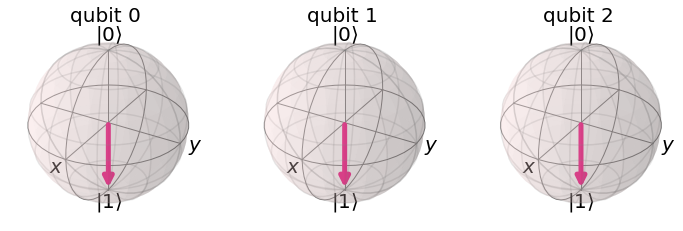

In [3]:
sim = Aer.get_backend("aer_simulator")
qc_init = circuit.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [4]:
statevector.draw('latex')

<IPython.core.display.Latex object>

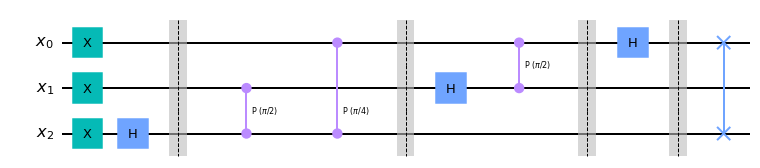

In [5]:
circuit.h(2)
circuit.barrier()
circuit.cp(pi/2, 1, 2)
circuit.cp(pi/4, 0, 2)
circuit.barrier()
circuit.h(1)
circuit.cp(pi/2, 0, 1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.swap(0, 2)

circuit.draw(output='mpl')

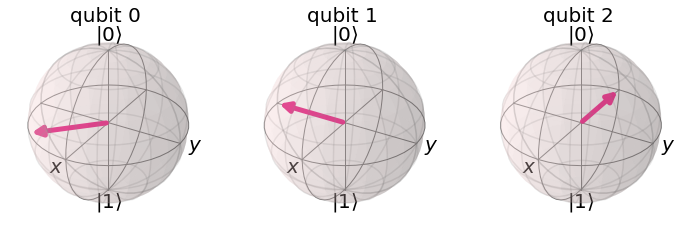

In [6]:
sim = Aer.get_backend("aer_simulator")
qc_init = circuit.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [7]:
statevector.draw('latex')

<IPython.core.display.Latex object>

In [14]:
measurement = circuit.copy()
measurement.measure_all()
backend = QasmSimulator()
qc_compiled = transpile(measurement, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'101': 130, '001': 139, '110': 127, '100': 148, '011': 119, '111': 111, '000': 134, '010': 116}


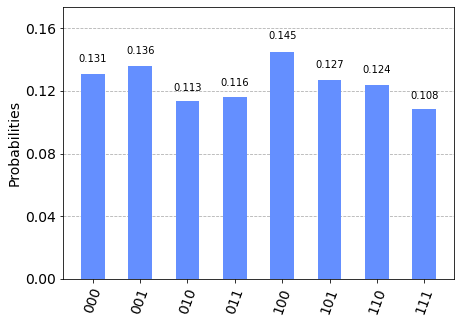

In [15]:
plot_histogram(counts)

In [21]:
#from qiskit.circuit.library.blueprintcircuit.BlueprintCircuit import QFT
from qiskit.circuit.library import QFT

In [35]:
qiskit_qft = QFT(3)

In [36]:
type(qiskit_qft)

qiskit.circuit.library.basis_change.qft.QFT

In [37]:
print(qiskit_qft)

     ┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1 QFT ├
     │      │
q_2: ┤2     ├
     └──────┘


In [38]:
measurement = qiskit_qft.copy()
measurement.measure_all()
backend = QasmSimulator()
qc_compiled = transpile(measurement, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'101': 120, '011': 148, '111': 107, '000': 127, '010': 134, '100': 129, '001': 132, '110': 127}


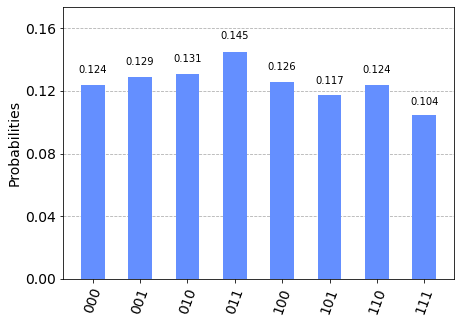

In [39]:
plot_histogram(counts)